<a href="https://colab.research.google.com/github/DEKU-O7/DATA-ANALYSIS/blob/main/DATA_SCIENCE_MAJOR_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# NAME:DHANUMITHA VIJAYAKUMAR
# COURSE: DATA SCIENCE
# BATCH: JANUARY 2025

In [ ]:
# @title DATA SCIENCE MAJOR PROJECT (Data Set) {"display-mode":"both"}
#importing the python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
#Imorting and printing the given data set
print("DATA SET\n\n")
data=pd.read_csv("/data (1).csv")
print(data)

DATA SET


     footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature  fail
0           0         7   7    1   6    6  36   3            1     1
1         190         1   3    3   5    1  20   4            1     0
2          31         7   2    2   6    1  24   6            1     0
3          83         4   3    4   5    1  28   6            1     0
4         640         7   5    6   4    0  68   6            1     0
..        ...       ...  ..  ...  ..  ...  ..  ..          ...   ...
939         0         7   7    1   6    4  73   6           24     1
940         0         7   5    2   6    6  50   6           24     1
941         0         3   6    2   7    5  43   6           24     1
942         0         6   6    2   5    6  46   7           24     1
943        18         7   4    2   6    3  61   7           24     1

[944 rows x 10 columns]


In [ ]:
# @title EXPLORING THE DATA {"display-mode":"form"}

print("BASIC INFORMATION\n")
print(data.info())

BASIC INFORMATION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB
None


In [ ]:
print("DESCRIPTION - SUMMARY STATISTICS\n")
data.describe()

DESCRIPTION - SUMMARY STATISTICS



,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


In [ ]:
print(data.shape)

(944, 10)


In [ ]:
print(data.isnull().sum())

footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64


In [ ]:
data.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [ ]:
data.tail()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
939,0,7,7,1,6,4,73,6,24,1
940,0,7,5,2,6,6,50,6,24,1
941,0,3,6,2,7,5,43,6,24,1
942,0,6,6,2,5,6,46,7,24,1
943,18,7,4,2,6,3,61,7,24,1


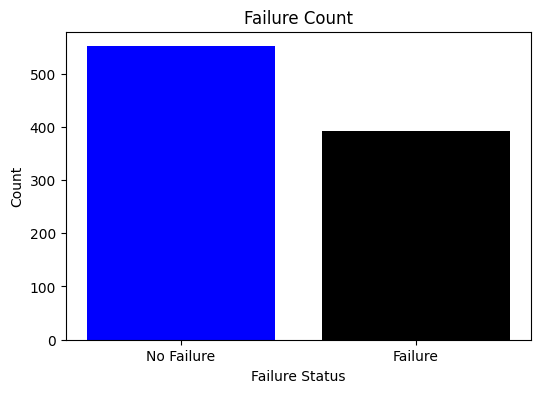

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(data['fail'].value_counts().index, data['fail'].value_counts().values, color=['blue', 'black'])
plt.xticks([0, 1], ['No Failure', 'Failure'])
plt.xlabel("Failure Status")
plt.ylabel("Count")
plt.title("Failure Count")
plt.show()

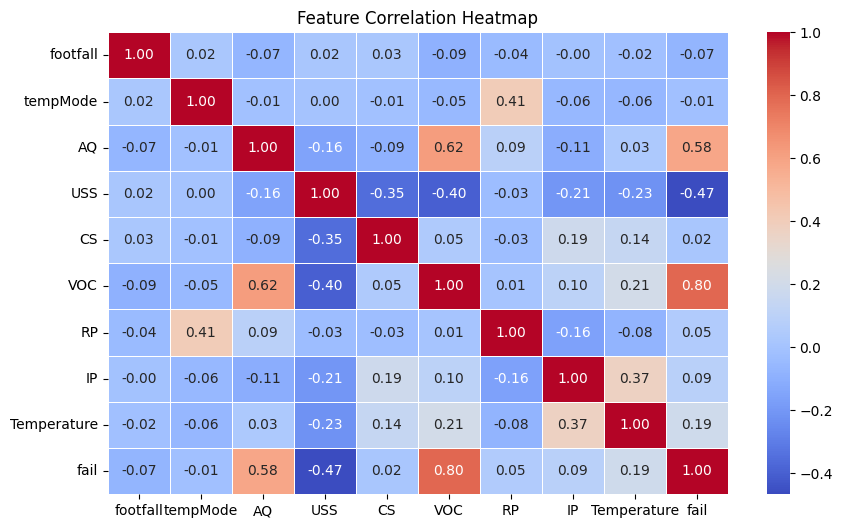

In [ ]:
# Compute correlation matrix
correlation_matrix = data.corr()

# Plot heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# Correlation of features with 'fail'
failure_correlation = correlation_matrix["fail"].drop("fail").sort_values(ascending=False)
print("\nCorrelation of Features with Machine Failure:")
print(failure_correlation)


Correlation of Features with Machine Failure:
VOC            0.797329
AQ             0.583238
Temperature    0.190257
IP             0.085624
RP             0.053668
CS             0.018855
tempMode      -0.014462
footfall      -0.073066
USS           -0.466574
Name: fail, dtype: float64


In [ ]:
# Feature importance using RandomForestClassifier
#  It ranks the most influential factors in machine failure.
X = data.drop(columns=["fail"])
y = data["fail"]

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance Ranking:")
print(feature_importances)



Feature Importance Ranking:
VOC            0.418596
AQ             0.203282
USS            0.119737
CS             0.059648
RP             0.050531
footfall       0.049972
Temperature    0.045628
IP             0.026764
tempMode       0.025840
dtype: float64


In [ ]:
# Logistic Regression for footfall vs fail
X_footfall = data[["footfall"]]
y_fail = data["fail"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_footfall, y_fail, test_size=0.2, random_state=42, stratify=y_fail)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred = log_reg.predict(X_test_scaled)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("\nLogistic Regression Analysis for Footfall vs Machine Failure:")
print(f"Accuracy: {accuracy:.2f}")
print(report)


Logistic Regression Analysis for Footfall vs Machine Failure:
Accuracy: 0.58
              precision    recall  f1-score   support

           0       0.58      1.00      0.74       110
           1       0.00      0.00      0.00        79

    accuracy                           0.58       189
   macro avg       0.29      0.50      0.37       189
weighted avg       0.34      0.58      0.43       189



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Logistic Regression for tempMode vs fail
X_tempMode = data[["tempMode"]]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tempMode, y_fail, test_size=0.2, random_state=42, stratify=y_fail)

# Standardize the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
log_reg_temp = LogisticRegression()
log_reg_temp.fit(X_train_scaled, y_train)

# Predictions
y_pred_temp = log_reg_temp.predict(X_test_scaled)

# Evaluate model
accuracy_temp = accuracy_score(y_test, y_pred_temp)
report_temp = classification_report(y_test, y_pred_temp)

print("\nLogistic Regression Analysis for TempMode vs Machine Failure:")
print(f"Accuracy: {accuracy_temp:.2f}")
print(report_temp)


Logistic Regression Analysis for TempMode vs Machine Failure:
Accuracy: 0.58
              precision    recall  f1-score   support

           0       0.58      1.00      0.74       110
           1       0.00      0.00      0.00        79

    accuracy                           0.58       189
   macro avg       0.29      0.50      0.37       189
weighted avg       0.34      0.58      0.43       189



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Logistic Regression for AQ vs fail
X_AQ = data[["AQ"]]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_AQ, y_fail, test_size=0.2, random_state=42, stratify=y_fail)

# Standardize the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
log_reg_AQ = LogisticRegression()
log_reg_AQ.fit(X_train_scaled, y_train)

# Predictions
y_pred_AQ = log_reg_AQ.predict(X_test_scaled)

# Evaluate model
accuracy_AQ = accuracy_score(y_test, y_pred_AQ)
report_AQ = classification_report(y_test, y_pred_AQ)

print("\nLogistic Regression Analysis for AQ vs Machine Failure:")
print(f"Accuracy: {accuracy_AQ:.2f}")
print(report_AQ)



Logistic Regression Analysis for AQ vs Machine Failure:
Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       110
           1       0.72      0.77      0.74        79

    accuracy                           0.78       189
   macro avg       0.77      0.78      0.77       189
weighted avg       0.78      0.78      0.78       189



In [ ]:
# Logistic Regression for USS vs fail
X_USS = data[["USS"]]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_USS, y_fail, test_size=0.2, random_state=42, stratify=y_fail)

# Standardize the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
log_reg_USS = LogisticRegression()
log_reg_USS.fit(X_train_scaled, y_train)

# Predictions
y_pred_USS = log_reg_USS.predict(X_test_scaled)

# Evaluate model
accuracy_USS = accuracy_score(y_test, y_pred_USS)
report_USS = classification_report(y_test, y_pred_USS)

print("\nLogistic Regression Analysis for USS vs Machine Failure:")
print(f"Accuracy: {accuracy_USS:.2f}")
print(report_USS)


Logistic Regression Analysis for USS vs Machine Failure:
Accuracy: 0.71
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       110
           1       0.63      0.75      0.68        79

    accuracy                           0.71       189
   macro avg       0.71      0.71      0.71       189
weighted avg       0.72      0.71      0.71       189



In [ ]:
# Logistic Regression for CS vs fail
X_CS = data[["CS"]]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_CS, y_fail, test_size=0.2, random_state=42, stratify=y_fail)

# Standardize the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
log_reg_CS = LogisticRegression()
log_reg_CS.fit(X_train_scaled, y_train)

# Predictions
y_pred_CS = log_reg_CS.predict(X_test_scaled)

# Evaluate model
accuracy_CS = accuracy_score(y_test, y_pred_CS)
report_CS = classification_report(y_test, y_pred_CS)

print("\nLogistic Regression Analysis for CS vs Machine Failure:")
print(f"Accuracy: {accuracy_CS:.2f}")
print(report_CS)


Logistic Regression Analysis for CS vs Machine Failure:
Accuracy: 0.58
              precision    recall  f1-score   support

           0       0.58      1.00      0.74       110
           1       0.00      0.00      0.00        79

    accuracy                           0.58       189
   macro avg       0.29      0.50      0.37       189
weighted avg       0.34      0.58      0.43       189



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Logistic Regression for VOC vs fail
X_VOC = data[["VOC"]]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_VOC, y_fail, test_size=0.2, random_state=42, stratify=y_fail)

# Standardize the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
log_reg_VOC = LogisticRegression()
log_reg_VOC.fit(X_train_scaled, y_train)

# Predictions
y_pred_VOC = log_reg_VOC.predict(X_test_scaled)

# Evaluate model
accuracy_VOC = accuracy_score(y_test, y_pred_VOC)
report_VOC = classification_report(y_test, y_pred_VOC)

print("\nLogistic Regression Analysis for VOC vs Machine Failure:")
print(f"Accuracy: {accuracy_VOC:.2f}")
print(report_VOC)


Logistic Regression Analysis for VOC vs Machine Failure:
Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       110
           1       0.86      0.96      0.91        79

    accuracy                           0.92       189
   macro avg       0.92      0.93      0.92       189
weighted avg       0.93      0.92      0.92       189



In [ ]:
# Logistic Regression for RP vs fail
X_RP = data[["RP"]]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_RP, y_fail, test_size=0.2, random_state=42, stratify=y_fail)

# Standardize the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
log_reg_RP = LogisticRegression()
log_reg_RP.fit(X_train_scaled, y_train)

# Predictions
y_pred_RP = log_reg_RP.predict(X_test_scaled)

# Evaluate model
accuracy_RP = accuracy_score(y_test, y_pred_RP)
report_RP= classification_report(y_test, y_pred_RP)

print("\nLogistic Regression Analysis for RP vs Machine Failure:")
print(f"Accuracy: {accuracy_RP:.2f}")
print(report_RP)


Logistic Regression Analysis for RP vs Machine Failure:
Accuracy: 0.58
              precision    recall  f1-score   support

           0       0.58      1.00      0.74       110
           1       0.00      0.00      0.00        79

    accuracy                           0.58       189
   macro avg       0.29      0.50      0.37       189
weighted avg       0.34      0.58      0.43       189



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Logistic Regression for IP vs fail
X_IP = data[["IP"]]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_IP, y_fail, test_size=0.2, random_state=42, stratify=y_fail)

# Standardize the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
log_reg_IP = LogisticRegression()
log_reg_IP.fit(X_train_scaled, y_train)

# Predictions
y_pred_IP = log_reg_IP.predict(X_test_scaled)

# Evaluate model
accuracy_IP = accuracy_score(y_test, y_pred_RP)
report_IP= classification_report(y_test, y_pred_RP)

print("\nLogistic Regression Analysis for IP vs Machine Failure:")
print(f"Accuracy: {accuracy_RP:.2f}")
print(report_IP)


Logistic Regression Analysis for IP vs Machine Failure:
Accuracy: 0.58
              precision    recall  f1-score   support

           0       0.58      1.00      0.74       110
           1       0.00      0.00      0.00        79

    accuracy                           0.58       189
   macro avg       0.29      0.50      0.37       189
weighted avg       0.34      0.58      0.43       189



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Logistic Regression for Temperature vs fail
X_Temperature = data[["Temperature"]]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_Temperature, y_fail, test_size=0.2, random_state=42, stratify=y_fail)

# Standardize the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
log_reg_Temperature = LogisticRegression()
log_reg_Temperature.fit(X_train_scaled, y_train)

# Predictions
y_pred_Temperature = log_reg_Temperature.predict(X_test_scaled)

# Evaluate model
accuracy_Temperature = accuracy_score(y_test, y_pred_Temperature)
report_Temperature= classification_report(y_test, y_pred_Temperature)

print("\nLogistic Regression Analysis for Temperature vs Machine Failure:")
print(f"Accuracy: {accuracy_RP:.2f}")
print(report_Temperature)


Logistic Regression Analysis for Temperature vs Machine Failure:
Accuracy: 0.58
              precision    recall  f1-score   support

           0       0.59      0.84      0.69       110
           1       0.47      0.20      0.28        79

    accuracy                           0.57       189
   macro avg       0.53      0.52      0.49       189
weighted avg       0.54      0.57      0.52       189



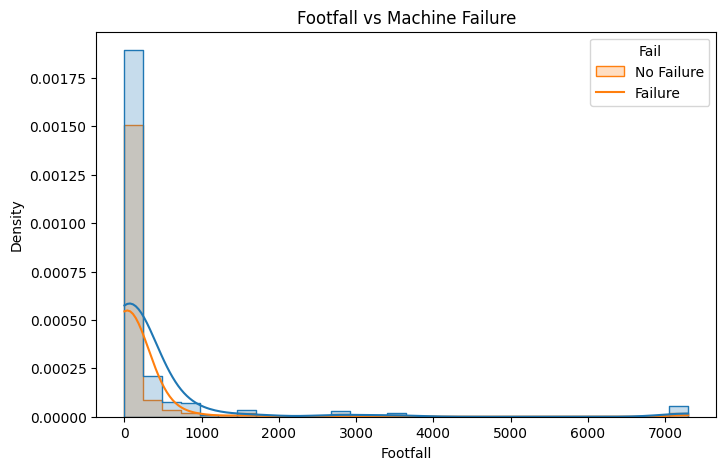

In [ ]:
# Plot appropriate Footfall vs Fail correlation graph
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x="footfall", hue="fail", kde=True, bins=30, element="step", stat="density")
plt.title("Footfall vs Machine Failure")
plt.xlabel("Footfall")
plt.ylabel("Density")
plt.legend(title="Fail", labels=["No Failure", "Failure"])
plt.show()

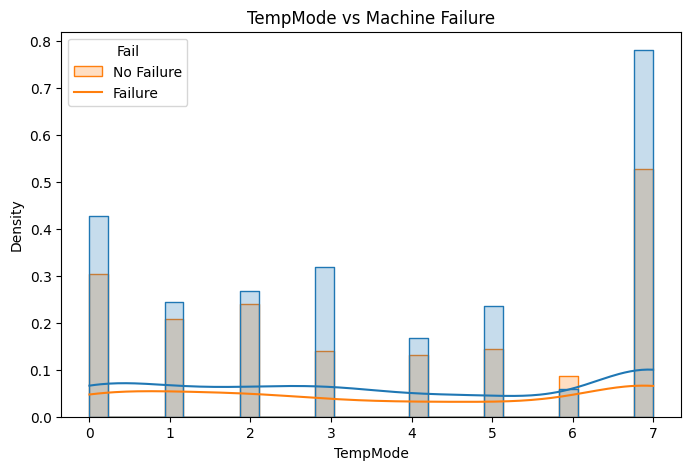

In [ ]:
# Plot TempMode vs Fail correlation graph
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x="tempMode", hue="fail", kde=True, bins=30, element="step", stat="density")
plt.title("TempMode vs Machine Failure")
plt.xlabel("TempMode")
plt.ylabel("Density")
plt.legend(title="Fail", labels=["No Failure", "Failure"])
plt.show()

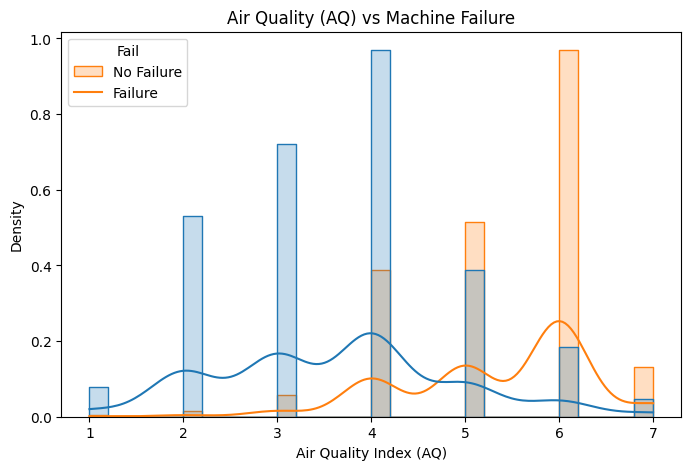

In [ ]:
# Plot AQ vs Fail correlation graph
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x="AQ", hue="fail", kde=True, bins=30, element="step", stat="density")
plt.title("Air Quality (AQ) vs Machine Failure")
plt.xlabel("Air Quality Index (AQ)")
plt.ylabel("Density")
plt.legend(title="Fail", labels=["No Failure", "Failure"])
plt.show()

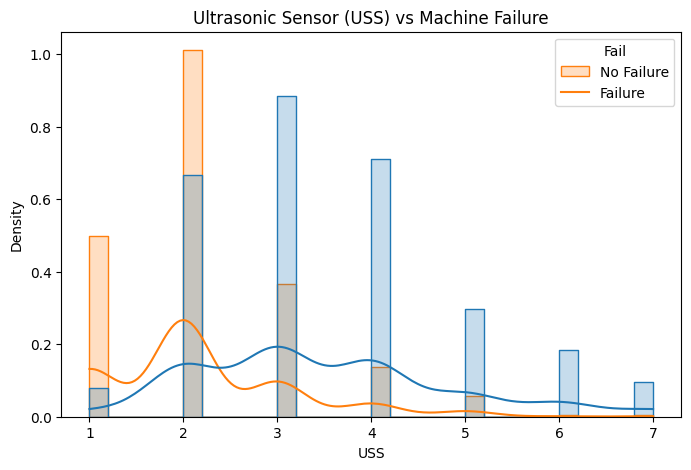

In [ ]:
# Plot USS vs Fail correlation graph
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x="USS", hue="fail", kde=True, bins=30, element="step", stat="density")
plt.title("Ultrasonic Sensor (USS) vs Machine Failure")
plt.xlabel("USS")
plt.ylabel("Density")
plt.legend(title="Fail", labels=["No Failure", "Failure"])
plt.show()


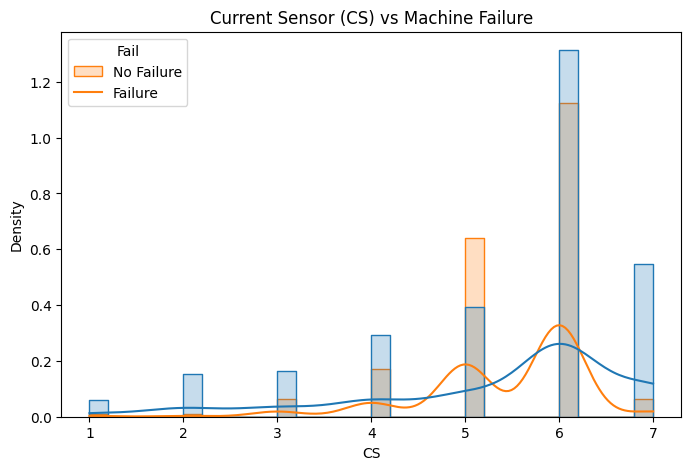

In [ ]:
# Plot CS vs Fail correlation graph
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x="CS", hue="fail", kde=True, bins=30, element="step", stat="density")
plt.title("Current Sensor (CS) vs Machine Failure")
plt.xlabel("CS")
plt.ylabel("Density")
plt.legend(title="Fail", labels=["No Failure", "Failure"])
plt.show()

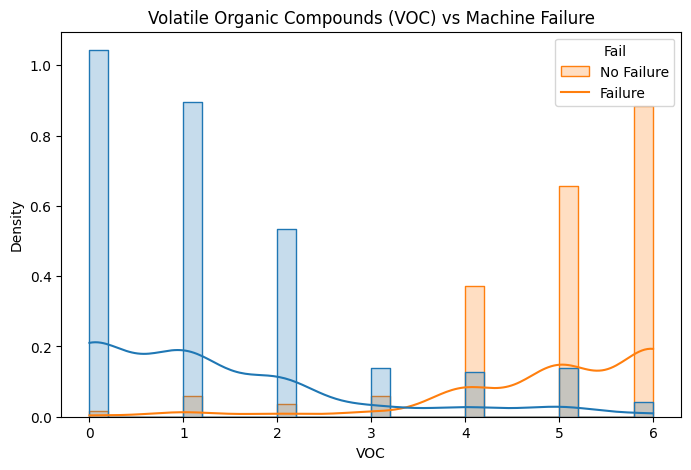

In [ ]:
# Plot VOC vs Fail correlation graph
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x="VOC", hue="fail", kde=True, bins=30, element="step", stat="density")
plt.title("Volatile Organic Compounds (VOC) vs Machine Failure")
plt.xlabel("VOC")
plt.ylabel("Density")
plt.legend(title="Fail", labels=["No Failure", "Failure"])
plt.show()

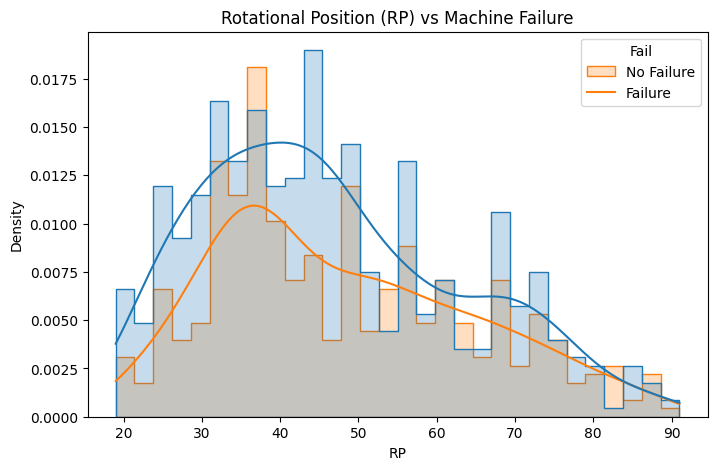

In [ ]:
# Plot RP vs Fail correlation graph
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x="RP", hue="fail", kde=True, bins=30, element="step", stat="density")
plt.title("Rotational Position (RP) vs Machine Failure")
plt.xlabel("RP")
plt.ylabel("Density")
plt.legend(title="Fail", labels=["No Failure", "Failure"])
plt.show()

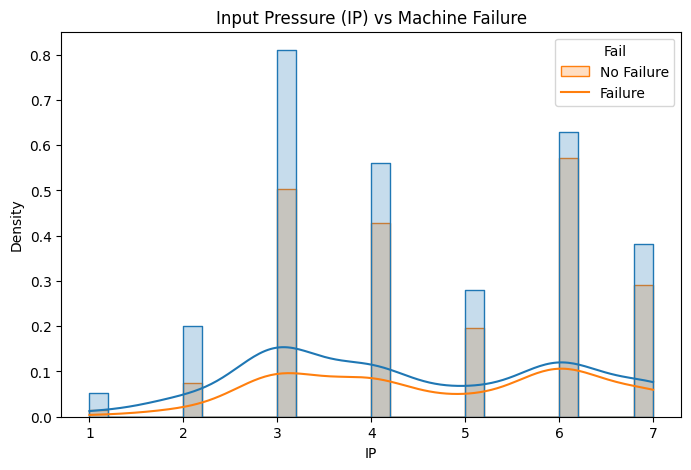

In [ ]:
# Plot IP vs Fail correlation graph
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x="IP", hue="fail", kde=True, bins=30, element="step", stat="density")
plt.title("Input Pressure (IP) vs Machine Failure")
plt.xlabel("IP")
plt.ylabel("Density")
plt.legend(title="Fail", labels=["No Failure", "Failure"])
plt.show()

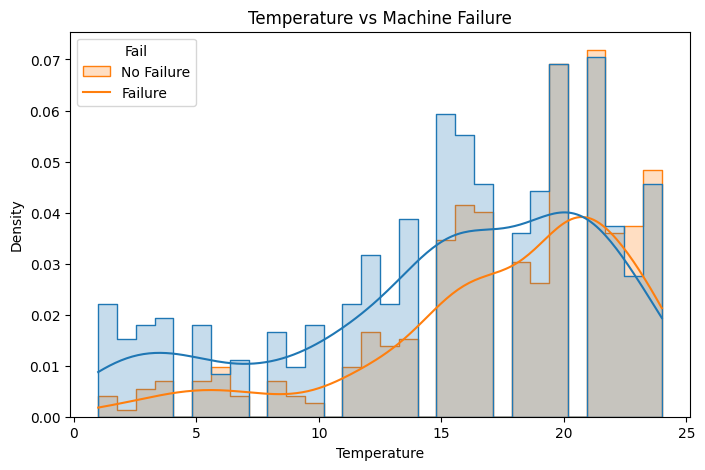

In [ ]:
# Plot Temperature vs Fail correlation graph
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x="Temperature", hue="fail", kde=True, bins=30, element="step", stat="density")
plt.title("Temperature vs Machine Failure")
plt.xlabel("Temperature")
plt.ylabel("Density")
plt.legend(title="Fail", labels=["No Failure", "Failure"])
plt.show()

In [ ]:
# Split dataset into features and target variable
X = data.drop(columns=["fail"])
y = data["fail"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(kernel='linear', probability=True, random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"{name} Model Accuracy: {accuracy:.2f}")
    print("\nClassification Report:")
    print(report)
    print("\nConfusion Matrix:")
    print(conf_matrix)


Training RandomForest...
RandomForest Model Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       110
           1       0.90      0.92      0.91        79

    accuracy                           0.93       189
   macro avg       0.92      0.93      0.92       189
weighted avg       0.93      0.93      0.93       189


Confusion Matrix:
[[102   8]
 [  6  73]]

Training GradientBoosting...
GradientBoosting Model Accuracy: 0.91

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       110
           1       0.88      0.91      0.89        79

    accuracy                           0.91       189
   macro avg       0.91      0.91      0.91       189
weighted avg       0.91      0.91      0.91       189


Confusion Matrix:
[[100  10]
 [  7  72]]

Training SVM...
SVM Model Accuracy: 0.89

Classification Report:
              precis

<ipython-input-83-2d421ee22fef>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients.index, y=coefficients["Coefficient"], palette="viridis")


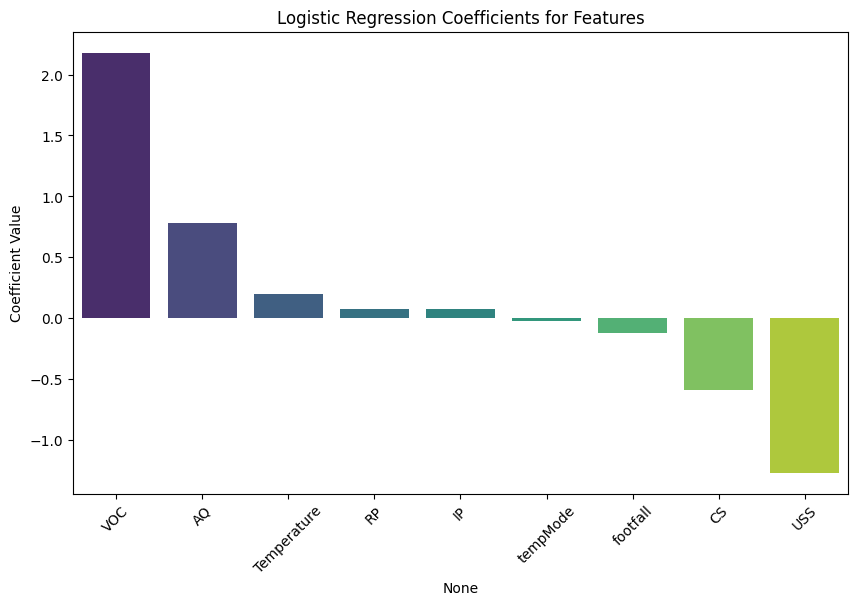

In [ ]:
# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Get coefficients for each feature
coefficients = pd.DataFrame(log_reg.coef_.flatten(), index=X.columns, columns=["Coefficient"])
coefficients = coefficients.sort_values(by="Coefficient", ascending=False)

# Plot logistic regression coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients.index, y=coefficients["Coefficient"], palette="viridis")
plt.xticks(rotation=45)
plt.title("Logistic Regression Coefficients for Features")
plt.ylabel("Coefficient Value")
plt.show()

In [ ]:
f=px.scatter(data_frame=data,x='footfall',y='fail',size='footfall',trendline='ols')
f.show()

In [ ]:
f=px.scatter(data_frame=data,x='tempMode',y='fail',size='tempMode',trendline='ols')
f.show()

In [ ]:
f=px.scatter(data_frame=data,x='AQ',y='fail',size='AQ',trendline='ols')
f.show()

In [ ]:
f=px.scatter(data_frame=data,x='USS',y='fail',size='USS',trendline='ols')
f.show()

In [ ]:
f=px.scatter(data_frame=data,x='CS',y='fail',size='CS',trendline='ols')
f.show()

In [ ]:
f=px.scatter(data_frame=data,x='VOC',y='fail',size='VOC',trendline='ols')
f.show()

In [ ]:
f=px.scatter(data_frame=data,x='RP',y='fail',size='RP',trendline='ols')
f.show()

In [ ]:
f=px.scatter(data_frame=data,x='IP',y='fail',size='IP',trendline='ols')
f.show()

In [ ]:
f=px.scatter(data_frame=data,x='Temperature',y='fail',size='Temperature',trendline='ols')
f.show()

In [ ]:
data_corr=data.corr()
print(data_corr['fail'])

footfall      -0.073066
tempMode      -0.014462
AQ             0.583238
USS           -0.466574
CS             0.018855
VOC            0.797329
RP             0.053668
IP             0.085624
Temperature    0.190257
fail           1.000000
Name: fail, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop(columns=["fail"])
y = data["fail"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42),
    "SVM": SVC(kernel='linear', probability=True, random_state=42)
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       110
           1       0.88      0.91      0.89        79

    accuracy                           0.91       189
   macro avg       0.91      0.91      0.91       189
weighted avg       0.91      0.91      0.91       189

Random Forest Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       110
           1       0.89      0.92      0.91        79

    accuracy                           0.92       189
   macro avg       0.92      0.92      0.92       189
weighted avg       0.92      0.92      0.92       189

Gradient Boosting Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       110
           1       0.88      0.92      0.90        79

    accuracy                           0.92       189
   macro avg       0.91      0.

<ipython-input-22-f46262adda4c>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




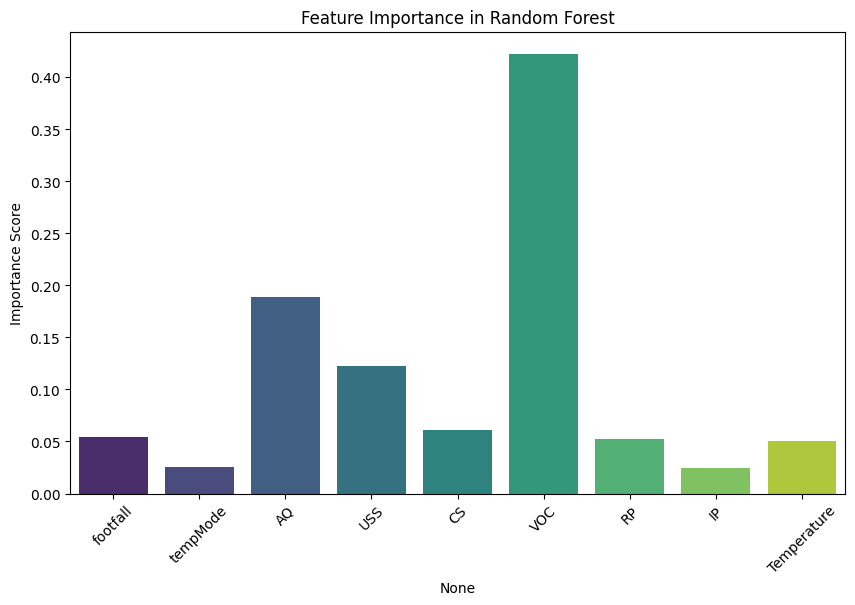

In [ ]:
feature_importance = models["Random Forest"].feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=X.columns, y=feature_importance, palette="viridis")
plt.xticks(rotation=45)
plt.title("Feature Importance in Random Forest")
plt.ylabel("Importance Score")
plt.show()